In [1]:
# Лабораторная работа № 4
### вариант № 2   Лила.В.Я
### группа: РИМ-101211                

In [2]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
import math
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from scipy.optimize import curve_fit

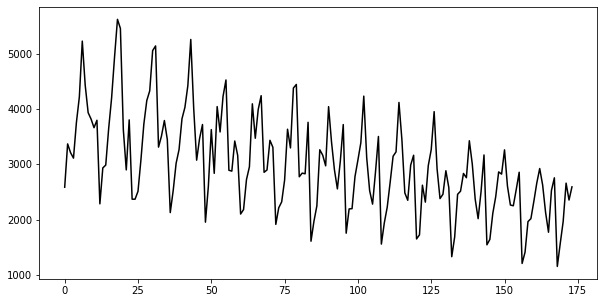

In [3]:
file = h5py.File('./files/Fort.mat', 'r') 
data = file.get('Fort') 
Fort = np.array(data)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()

Произведем ретроспективный прогноз, то есть у нас всегда будут точки, по которым можно будет сравнить, правильным получился прогноз, или нет. Для этого отрежем от данного ряда последние 24 точки (которые мы и будем прогнозировать):

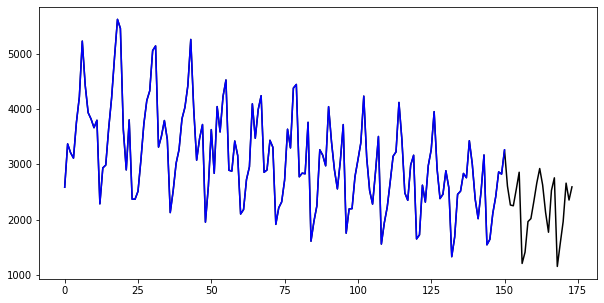

In [4]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

Для прогноза по методу регрессии используем готовые 
библиотеки. Например, с помощью sklearn:

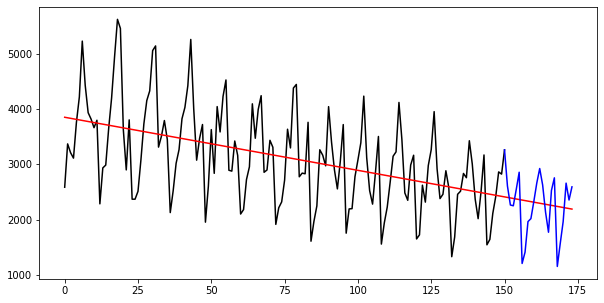

In [5]:
t=np.arange(0, len(Z), 1) # диапазон урезанного ряда
t=t.reshape(-1,1)
t0=np.arange(0, len(Fort), 1) # диапазон полного ряда
t0=t0.reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t, Z) # модель регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, reg.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

Напрямую через МНК библиотеки statsmodels:

Результирующие коэффициенты B0 и B1: [3849.23884629   -9.58949808]


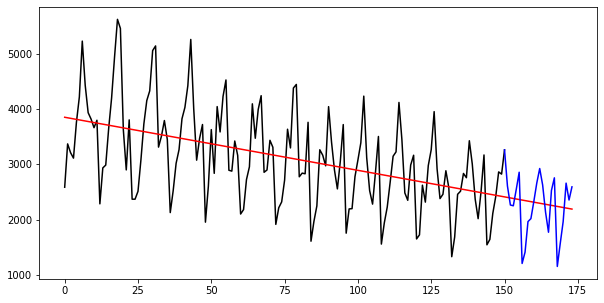

In [6]:
import statsmodels.api as sm
x_ = sm.add_constant(t)
smm = sm.OLS(Z, x_) 
res = smm.fit() # строим модель регрессии
print('Результирующие коэффициенты B0 и B1:',res.params) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, res.predict(sm.add_constant(t0)), 'r') # строим прогноз
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

Через полиномиальные кривые polyfit:

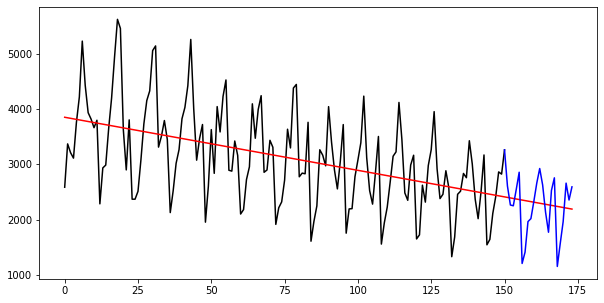

In [7]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1) 
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Через подгонку функций библиотеки scipy.optimize:

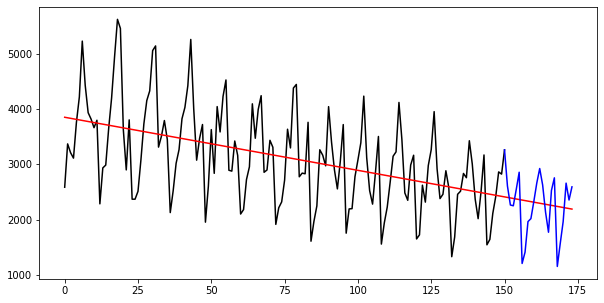

In [8]:
def func(t, b0, b1):
    return b0 + b1 * t
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Теперь аналогичным образом построим прогнозы трендов
данного ряда для регрессионной кривой второго и третьего порядка,
строя регрессионные модели тренда подобно тому, как это
происходило в лабораторной работе №3.

Коэффициенты B0, B1, B2: [ 3.85136553e+03 -9.67513622e+00  5.70920912e-04]


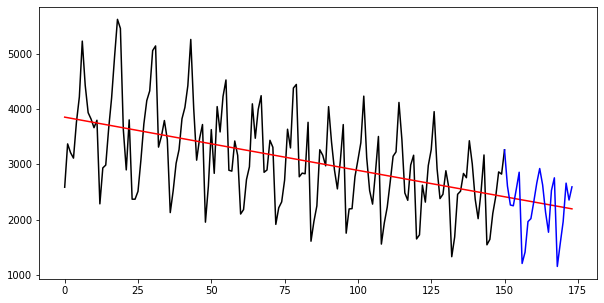

In [9]:
def func(t, b0, b1,b2):
    return b0+b1*t+b2*t*t
popt2, pcov2 = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*popt2[2]+t0*popt2[1]+popt2[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
print('Коэффициенты B0, B1, B2:',popt2) # получаем коэффициенты
plt.show()

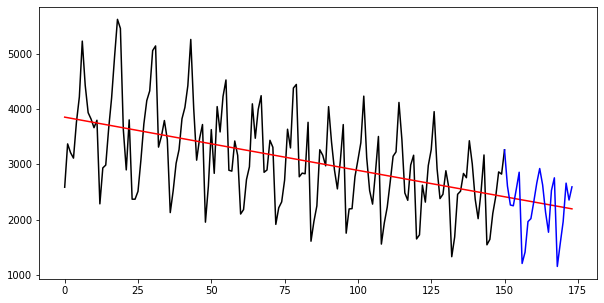

3851.3655266916803
-9.675136220020507
0.0005709209137652073


In [10]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 2) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()
print(bb[2])
print(bb[1])
print(bb[0])

### Модель тренда третьей степени

Коэффициенты B0, B1, B2,B3: [ 3.69558459e+03  2.99832429e+00 -2.11356707e-01  9.41900565e-04]


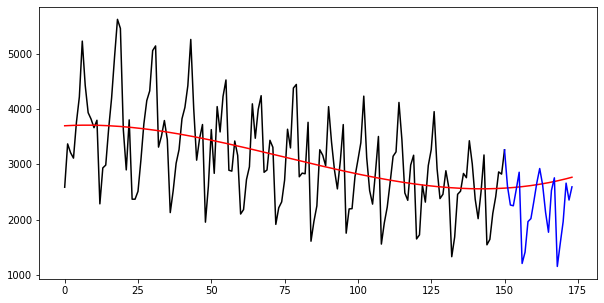

174


In [11]:
def func(t, b0, b1,b2,b3):
    return b0 + b1*t + b2*t*t + b3*t*t*t
popt3, pcov3 = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
print('Коэффициенты B0, B1, B2,B3:',popt3) # получаем коэффициенты
plt.show()
print(len(t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0]))

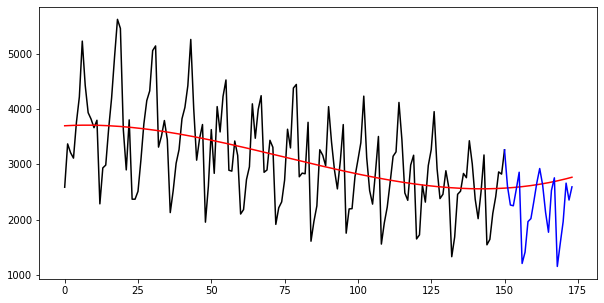

3695.5845919469825
2.998324286520656
-0.21135670661847228
0.0009419005668099451


In [12]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 3) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()
print(bb[3])
print(bb[2])
print(bb[1])
print(bb[0])

In [13]:
print ('Средняя ошибка прогноза',abs(np.sum(Fort[-24:])-np.sum(reg.predict(t0[-24:])))/len(Fort[-24:]))

Средняя ошибка прогноза 33.951572557220665


In [14]:
print('Средняя ошибка прогноза',abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*popt[1]+popt[0]))/len(Fort[-24:]))

Средняя ошибка прогноза 33.951572561884255


#### Регрессионной прямой второго порядка

In [15]:
print('Средняя ошибка прогноза',abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*t0[-24:]*popt2[2]+t0[-24:]*popt2[1]+popt2[0]))/len(Fort[-24:]))

Средняя ошибка прогноза 37.16595240288431


#### Регрессионной прямой третьего порядка

In [16]:
print('Средняя ошибка прогноза',abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*t0[-24:]*t0[-24:]*popt3[3]+t0[-24:]*t0[-24:]*popt3[2]+t0[-24:]*popt3[1]+popt3[0]))/len(Fort[-24:]))

Средняя ошибка прогноза 379.86356036270234


### Вычисление СКВО прогноза

#### Регрессионной прямой первого порядка

In [17]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*popt[1]+popt[0]))**2

print('СКВО прогноза:',np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза: 531.2841349811364


#### Регрессионной прямой второго порядка

In [18]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*popt2[2]+t0[i]*popt2[1]+popt2[0]))**2

print('СКВО прогноза:',np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза: 531.51357138277


#### Регрессионной прямой третьего порядка

In [19]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3]+t0[i]*t0[i]*popt3[2]+t0[i]*popt3[1]+popt3[0]))**2

print('СКВО прогноза:',np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза: 665.0082858768126


### Средняя ошибка аппроксимации:

#### Регрессионной прямой первого порядка

In [20]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*popt[1]+popt[0]) ))/Fort[i]

print('Средняя ошибка апроксимации:',(np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации: 23.51441298819064


#### Регрессионной прямой второго порядка

In [21]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*t0[i]*popt2[2]+t0[i]*popt2[1]+popt2[0]) ))/Fort[i]

print('Средняя ошибка апроксимации:',(np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации: 23.53339382816084


#### Регрессионной прямой третьего порядка

In [22]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1]+popt3[0]) ))/Fort[i]

print('Средняя ошибка апроксимации:',(np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации: 29.3051761072894


Этот показатель обычно интерпретируется следующим образом: если меньше 10%, то точность прогноза высокая, если от10% до 20%, то точность
прогноза хорошая, если от 20% до 50%, то точность прогноза удовлетворительная, если более 50%, то прогноз не удовлетворителен.

### Коэффициент несоответствия 1

In [23]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*popt[1]+popt[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 1-го порядка:',KH1)

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*popt2[2] + t0[i]*popt2[1] + popt2[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 2-го порядка:',KH1)

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1] + popt3[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 3-го порядка:',KH1)

Коэффициент несоответствия 1 при регрессионной прямой 1-го порядка: 0.2281001855332692
Коэффициент несоответствия 1 при регрессионной прямой 2-го порядка: 0.22819869117711378
Коэффициент несоответствия 1 при регрессионной прямой 3-го порядка: 0.28551297394763747


### Коэффициент несоответствия 2

In [24]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*popt[1]+popt[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 1-го порядка:',np.sqrt(a/b))
# --------------------------------------------------
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*t0[i]*popt2[2] + t0[i]*popt2[1] + popt2[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 2-го порядка:',np.sqrt(a/b))
# -------------------------------------------------
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1] + popt3[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 3-го порядка:',np.sqrt(a/b))

Коэффициент несоответствия 2 при регрессионной прямой 1-го порядка: 0.9906202068430789
Коэффициент несоответствия 2 при регрессионной прямой 2-го порядка: 0.9910480086927459
Коэффициент несоответствия 2 при регрессионной прямой 3-го порядка: 1.239959190068869


### Построим доверительные интервалы для тренда первого порядка

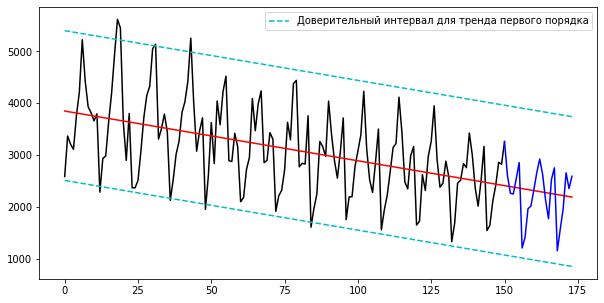

In [25]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1) 
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, p(t0)+upper, 'c--',label='Доверительный интервал для тренда первого порядка')
plt.plot(t0, p(t0)-lower, 'c--')
plt.legend()

plt.show()

### Построим доверительные интервалы для тренда второго порядка

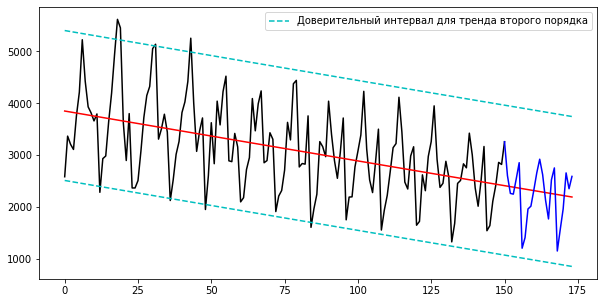

In [26]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 2) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0+upper, 'c--',label='Доверительный интервал для тренда второго порядка')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0-lower, 'c--')
plt.legend()

plt.show()

### Построим доверительные интервалы для тренда третьего порядка

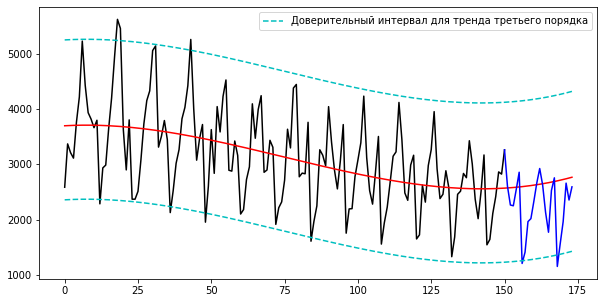

In [27]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 3) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0+upper, 'c--',label='Доверительный интервал для тренда третьего порядка')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0-lower, 'c--')
plt.legend()

plt.show()

Доверительный интервал всегда определяет две границы – верхнюю и
нижнюю. Внутри получившегося «коридора» находится расчетный прогноз.
Этот прогноз (будучи случайной величиной) не выходит статистически за
границы доверительного интервала с заданной величиной альфа.
Если построенная модель прогноза адекватна, то с вероятностью альфа
можно утверждать, что при сохранении сложившихся закономерностей
развития тенденции, прогноз попадает внутрь доверительного интервала.

#### К заданию 14. Самостоятельно зададим некоторую параметрическую кривую

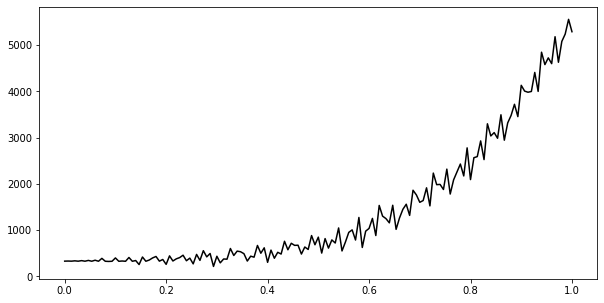

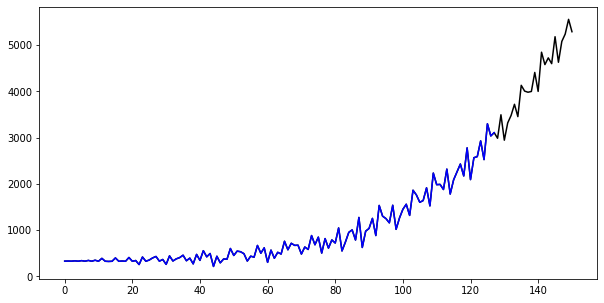

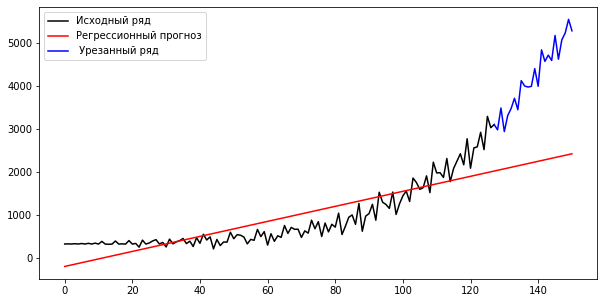

Значения коэффициентов B0, B1 [-192.06277501   17.470032  ]


In [28]:
 Fort=t**4/10**5 + t + (10**16)*np.sin(np.pi*t) + 1000*np.random.rand()
plt.figure(figsize = (10, 5))
t = np.linspace(0, 1, len(Fort))
plt.plot(t, Fort, 'k')
plt.show()

Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

t0=np.arange(0, len(Fort), 1) # диапазон полного ряда
t0=t0.reshape(-1,1)

def func(t, b0, b1):
    return b0 + b1 * t
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k',label='Исходный ряд')
plt.plot(t0, t0*popt[1]+popt[0], 'r',label='Регрессионный прогноз')
plt.plot(t0[-24:], Fort[-24:], 'b', label=' Урезанный ряд')
plt.legend()
plt.show()

print('Значения коэффициентов B0, B1', popt)

Теперь аналогичным образом построим прогнозы трендов данного ряда для регрессионной кривой второго и третьего порядка

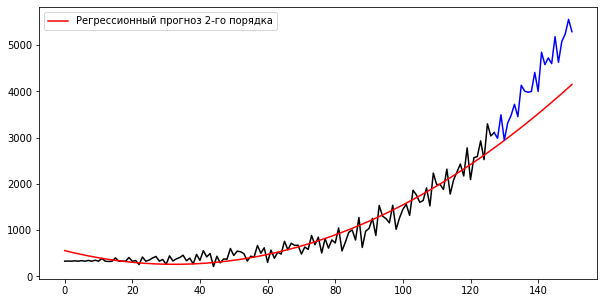

Коэффициенты B0, B1, B2: [ 5.58065534e+02 -1.82503635e+01  2.81262956e-01]


In [29]:
def func(t, b0, b1,b2):
    return b0+b1*t+b2*t*t
popt2, pcov2 = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*popt2[2]+t0*popt2[1]+popt2[0], 'r',label='Регрессионный прогноз 2-го порядка')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.legend()
plt.show()

print('Коэффициенты B0, B1, B2:',popt2) # получаем коэффициенты

Коэффициенты B0, B1, B2,B3: [ 2.88958343e+02  7.68698170e+00 -2.31322161e-01  2.69073552e-03]


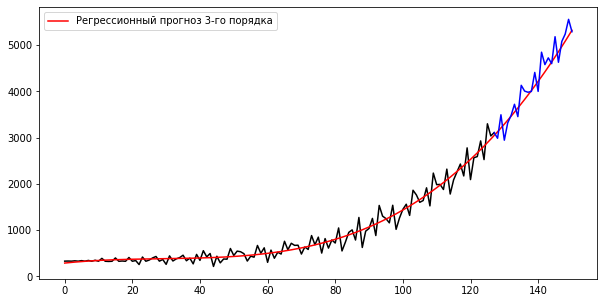

In [30]:
def func(t, b0, b1,b2,b3):
    return b0 + b1*t + b2*t*t + b3*t*t*t
popt3, pcov3 = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0], 'r',label='Регрессионный прогноз 3-го порядка')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.legend()
print('Коэффициенты B0, B1, B2,B3:',popt3) # получаем коэффициенты
plt.show()

### Оценка точности каждого из получившихся прогнозов 

### Средняя ошибка прогноза

#### Регрессионной прямой первого порядка

In [31]:
print('Средняя ошибка прогноза',abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*popt[1]+popt[0]))/len(Fort[-24:]))

Средняя ошибка прогноза 1969.547576284307


#### Регрессионной прямой второго порядка

In [32]:
print('Средняя ошибка прогноза',abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*t0[-24:]*popt2[2]+t0[-24:]*popt2[1]+popt2[0]))/len(Fort[-24:]))

Средняя ошибка прогноза 757.9605187455212


#### Регрессионной прямой третьего порядка

In [33]:
print('Средняя ошибка прогноза',abs(np.sum(Fort[-24:])-np.sum(t0[-24:]*t0[-24:]*t0[-24:]*popt3[3]+t0[-24:]*t0[-24:]*popt3[2]+t0[-24:]*popt3[1]+popt3[0]))/len(Fort[-24:]))

Средняя ошибка прогноза 89.68272107355976


### Вычисление СКВО прогноза

#### Регрессионной прямой первого порядка

In [34]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*popt[1]+popt[0]))**2

print('СКВО прогноза:',np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза: 2073.9672177621496


#### Регрессионной прямой второго порядка

In [35]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*popt2[2]+t0[i]*popt2[1]+popt2[0]))**2

print('СКВО прогноза:',np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза: 850.55926237147


#### Регрессионной прямой третьего порядка

In [36]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3]+t0[i]*t0[i]*popt3[2]+t0[i]*popt3[1]+popt3[0]))**2

print('СКВО прогноза:',np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза: 238.992645199


### Средняя ошибка аппроксимации:

#### Регрессионной прямой первого порядка

In [37]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*popt[1]+popt[0]) ))/Fort[i]

print('Средняя ошибка апроксимации:',(np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации: 45.58776971404499


#### Регрессионной прямой второго порядка

In [38]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*t0[i]*popt2[2]+t0[i]*popt2[1]+popt2[0]) ))/Fort[i]

print('Средняя ошибка апроксимации:',(np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации: 16.987257905185864


#### Регрессионной прямой третьго порядка

In [39]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1]+popt3[0]) ))/Fort[i]

print('Средняя ошибка апроксимации:',(np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации: 4.656850934004892


### Коэффициент несоответствия 1

In [40]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*popt[1]+popt[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 1-го порядка:',KH1)

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*popt2[2] + t0[i]*popt2[1] + popt2[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 2-го порядка:',KH1)

X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1] + popt3[0]))**2
a = np.sum(X) # числитель дроби

b = np.sum(np.square(Fort[-24:])) # Знаменатель дроби
KH1 = np.sqrt(a/b)
print('Коэффициент несоответствия 1 при регрессионной прямой 3-го порядка:',KH1)

Коэффициент несоответствия 1 при регрессионной прямой 1-го порядка: 0.486134041476582
Коэффициент несоответствия 1 при регрессионной прямой 2-го порядка: 0.19936950217474617
Коэффициент несоответствия 1 при регрессионной прямой 3-го порядка: 0.05601942957378652


### Коэффициент несоответствия 2

In [41]:
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*popt[1]+popt[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 1-го порядка:',np.sqrt(a/b))
# --------------------------------------------------
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*t0[i]*popt2[2] + t0[i]*popt2[1] + popt2[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 2-го порядка:',np.sqrt(a/b))
# -------------------------------------------------
X = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    X[i]=Fort[i]-(t0[i]*t0[i]*t0[i]*popt3[3] + t0[i]*t0[i]*popt3[2] + t0[i]*popt3[1] + popt3[0])
a = np.sum(np.square(X)) # числитель дроби

Y_sr = np.mean(Fort[-24:]) # средний уровень за весь период прогноза

Y = np.zeros(len(Fort))
for i in range(len(Fort)-24,len(Fort)):
    Y[i] = (Y_sr-Fort[i])

b = np.sum(np.square(Y[-24:])) # знаменатель дроби

print('Коэффициент несоответствия 2 при регрессионной прямой 3-го порядка:',np.sqrt(a/b))

Коэффициент несоответствия 2 при регрессионной прямой 1-го порядка: 2.710812352017034
Коэффициент несоответствия 2 при регрессионной прямой 2-го порядка: 1.1117372226582152
Коэффициент несоответствия 2 при регрессионной прямой 3-го порядка: 0.31237919726895763


### Построим доверительные интервалы для тренда первого порядка

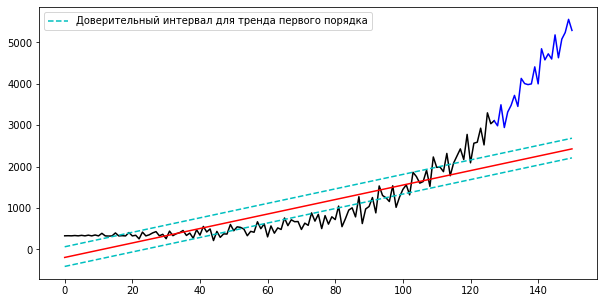

In [42]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1) 
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, p(t0)+upper, 'c--',label='Доверительный интервал для тренда первого порядка')
plt.plot(t0, p(t0)-lower, 'c--')
plt.legend()

plt.show()

### Построим доверительные интервалы для тренда второго порядка

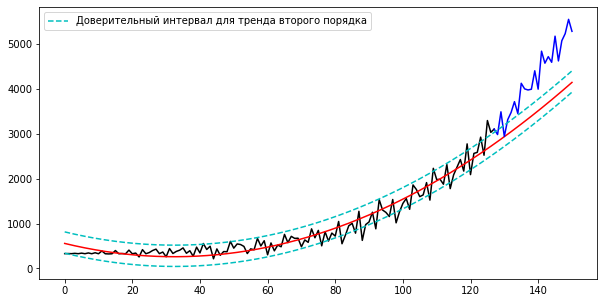

In [43]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 2) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0+upper, 'c--',label='Доверительный интервал для тренда второго порядка')
plt.plot(t0, bb[2]+bb[1]*t0+bb[0]*t0*t0-lower, 'c--')
plt.legend()

plt.show()

### Построим доверительные интервалы для тренда третьего порядка

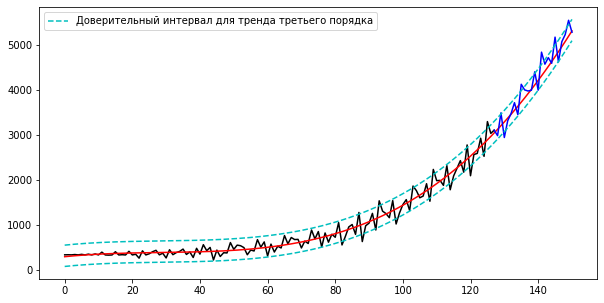

217.1255929955238
257.62998465835796


In [44]:
ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 3) 
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')

plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0+upper, 'c--',label='Доверительный интервал для тренда третьего порядка')
plt.plot(t0, bb[3]+bb[2]*t0+bb[1]*t0*t0+bb[0]*t0*t0*t0-lower, 'c--')
plt.legend()

plt.show()

print(lower)
print(upper)